### Objective: Build a Lie Detector Model

**Purpose:** Predict the future outcome for an individual in the program:
- **Complete Program Successfully:** 1
- **Discharge from the Program on Bad Terms:** 0

**Tasks:**

1. **Understanding the Distribution of Data:** 
   - Analyze key variables to identify their central tendencies and spread. This helps in understanding how the data is distributed, which is crucial for any form of modeling.

2. **Identifying Relationships Between Variables:**
   - Explore potential relationships between different variables using tools such as scatter plots, correlation matrices, and pivot tables. This helps in understanding which factors are most influential in determining the outcomes.

3. **Detecting Outliers:**
   - Identify and handle outliers in the data. Outliers can skew the results and could potentially lead to inaccurate models.

4. **Testing Assumptions:**
   - Verify the assumptions required for subsequent statistical tests and modeling. For instance, checking for normality if using techniques that assume normally distributed data.

5. **Visualizing Patterns and Trends:**
   - Use various visualization techniques to uncover hidden patterns and trends within the data. This can involve the use of line graphs, bar charts, and cluster diagrams.

6. **Generating Hypotheses:**
   - Based on initial findings, formulate hypotheses about the data which can later be tested using more detailed statistical models.

7. **Preparing for Further Analysis:**
   - Use insights from EDA to prepare the data further for modeling. This might include deciding on which features to include, which data transformations are necessary, and how best to split the data for training and testing.

**Columns and Their Acronyms:**
- **Permanency/Navigating Welfare System (PWS)**
- **Daily Living (DL)**
- **Self Care (SC)**
- **Relationships & Communication (RC)**
- **Housing & Money Management (HMM)**
- **Work & Study Life (WSL)**
- **Career & Education Planning (CEP)**
- **Looking Forward (LF)**



In [5]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

### ***Initial Exploration*** 

In [6]:
thp_df2 = pd.read_csv("/Users/oakmoreroadinc./Desktop/Data Science /Portfolio Data Science /clean_thp_df2.csv")
thp_df2.head()

,Youth ID,gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,Category,result_score,fraud_alert,row_std
0,1,M,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,264,Good,1,0.046791,0.442620
1,2,M,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,467,Good,1,0.045256,0.349816
2,3,M,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,49,Bad,0,0.046711,0.325793
3,4,M,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,22.48,908,Good,1,0.029993,0.669435
4,5,F,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,241,Bad,0,0.049339,0.525622


In [7]:
#check for missing values 
#check data types
thp_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Youth ID      22 non-null     int64  
 1   gender        22 non-null     object 
 2   PWS           22 non-null     float64
 3   DL            22 non-null     float64
 4   SC            22 non-null     float64
 5   RC            22 non-null     float64
 6   HMM           22 non-null     float64
 7   WSL           22 non-null     float64
 8   CEP           22 non-null     float64
 9   LF            22 non-null     float64
 10  grand_total   22 non-null     float64
 11  days_spent    22 non-null     int64  
 12  Category      22 non-null     object 
 13  result_score  22 non-null     int64  
 14  fraud_alert   22 non-null     float64
 15  row_std       22 non-null     float64
dtypes: float64(11), int64(3), object(2)
memory usage: 2.9+ KB


In [ ]:
# 'thp_df2' contains 22 rows of youth data and assesment scores . 
# no youth's are missing information. 

In [9]:
#How Many data points do we have in each categorical variable?
thp_df2.value_counts(["gender","Category"])

gender  Category
M       Good        9
        Bad         7
F       Good        4
        Bad         2
dtype: int64

In [10]:
#another syntax for getting value counts
print(thp_df2[["gender","Category"]].value_counts())

gender  Category
M       Good        9
        Bad         7
F       Good        4
        Bad         2
dtype: int64


In [11]:
thp_df2.describe()

,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,result_score,fraud_alert,row_std
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,11.500000,4.115909,4.392273,4.400909,4.551364,3.853636,4.241818,3.989091,4.523636,34.068636,475.363636,0.590909,0.045455,0.363303
std,6.493587,0.742965,0.683241,0.617953,0.477466,0.719739,0.661727,0.817650,0.562126,4.729559,282.466778,0.503236,0.006310,0.199258
min,1.000000,2.500000,2.240000,2.710000,3.440000,2.090000,2.700000,2.110000,3.250000,22.480000,49.000000,0.000000,0.029993,0.000000
25%,6.250000,3.562500,4.410000,4.027500,4.247500,3.502500,4.062500,3.357500,4.030000,32.047500,244.000000,0.000000,0.042758,0.277717
50%,11.500000,4.150000,4.560000,4.590000,4.780000,3.740000,4.375000,3.945000,4.750000,34.870000,469.500000,1.000000,0.046524,0.377422
75%,16.750000,4.862500,4.717500,4.820000,4.940000,4.097500,4.725000,4.780000,5.000000,36.967500,694.000000,1.000000,0.049322,0.513529
max,22.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000,1026.000000,1.000000,0.053368,0.669435


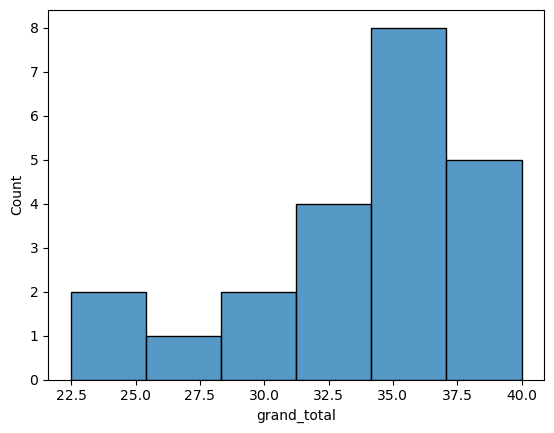

In [13]:
sns.histplot(data=thp_df2, x="grand_total")
plt.show()

In [ ]:
# looks like assesment 'total_score' hovered around 32 to 40 for most youths in the dataset
# but a few youth's experienced very low assesment total scores of 22 to 30.

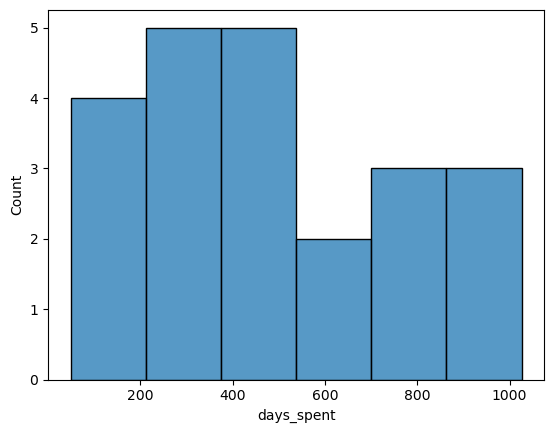

In [16]:
sns.histplot(data=thp_df2, x="days_spent")
plt.show()

### **Most youth's spent at least 200 to 400 days in the program before exit.** 

### **A few youth's experienced 600 to 1000 days in the program before exit.**

## Data Validation 
###### Are data types and ranges are as expected? 


In [17]:
thp_df2.dtypes

Youth ID          int64
gender           object
PWS             float64
DL              float64
SC              float64
RC              float64
HMM             float64
WSL             float64
CEP             float64
LF              float64
grand_total     float64
days_spent        int64
Category         object
result_score      int64
fraud_alert     float64
row_std         float64
dtype: object

In [19]:
#validating categorical data
# is there a False in the list? 
thp_df2["gender"].isin(["M", "F"])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
Name: gender, dtype: bool

In [21]:
## identifying values not on the list. Do you see a True?
~thp_df2["gender"].isin(["M", "F"])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: gender, dtype: bool

In [22]:
thp_df2[thp_df2["gender"].isin(["M", "F"])].head()

,Youth ID,gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,Category,result_score,fraud_alert,row_std
0,1,M,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,264,Good,1,0.046791,0.442620
1,2,M,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,467,Good,1,0.045256,0.349816
2,3,M,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,49,Bad,0,0.046711,0.325793
3,4,M,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,22.48,908,Good,1,0.029993,0.669435
4,5,F,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,241,Bad,0,0.049339,0.525622


In [23]:
# Define a Series describing whether each Categopry is not Bad.      
not_bad=~thp_df2["Category"].isin(["Bad"])
# Print 'thp_df2' without records related to youth in the 'Bad'category
print(thp_df2[not_bad])

    Youth ID gender   PWS    DL    SC    RC   HMM   WSL   CEP    LF  \
0          1      M  3.80  4.47  4.41  4.33  3.96  4.10  5.00  5.00   
1          2      M  4.00  4.41  4.53  4.78  3.70  4.40  4.10  4.00   
3          4      M  3.55  2.24  2.71  3.83  2.09  2.70  2.11  3.25   
6          7      M  3.50  4.53  4.82  4.44  3.70  4.05  3.33  4.00   
10        11      M  3.35  4.00  3.88  3.83  3.57  3.65  3.22  4.75   
12        13      F  4.35  4.53  4.82  4.67  3.70  4.80  3.89  4.88   
13        14      F  5.00  4.94  5.00  5.00  5.00  4.75  5.00  5.00   
14        15      M  3.95  4.47  4.47  4.50  3.43  4.10  4.00  4.12   
15        16      F  4.95  5.00  4.94  4.94  4.91  5.00  5.00  5.00   
16        17      M  3.60  4.65  3.94  4.22  3.57  4.10  3.11  4.75   
18        19      F  3.40  4.72  4.78  5.00  4.10  4.58  3.44  4.71   
20        21      M  3.60  4.35  3.82  3.94  3.48  4.15  3.56  3.88   
21        22      M  2.50  3.35  3.12  3.44  2.83  3.00  3.78  3.30   

    g

In [24]:
#validating numerical data
#viewing only numerical columns 

thp_df2.select_dtypes("number").head()

,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,result_score,fraud_alert,row_std
0,1,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,264,1,0.046791,0.442620
1,2,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,467,1,0.045256,0.349816
2,3,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,49,0,0.046711,0.325793
3,4,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,22.48,908,1,0.029993,0.669435
4,5,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,241,0,0.049339,0.525622


## Summarizing Data 

In [25]:
thp_df2.head()

,Youth ID,gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,Category,result_score,fraud_alert,row_std
0,1,M,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,264,Good,1,0.046791,0.442620
1,2,M,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,467,Good,1,0.045256,0.349816
2,3,M,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,49,Bad,0,0.046711,0.325793
3,4,M,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,22.48,908,Good,1,0.029993,0.669435
4,5,F,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,241,Bad,0,0.049339,0.525622


In [26]:
thp_df2.groupby("gender").mean()

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1683/3563244261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  thp_df2.groupby("gender").mean()


,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,result_score,fraud_alert,row_std
gender,,,,,,,,,,,,,,
F,12.833333,4.558333,4.718333,4.765000,4.896667,4.14000,4.621667,4.221667,4.911667,36.833333,359.5000,0.666667,0.049143,0.386279
M,11.000000,3.950000,4.270000,4.264375,4.421875,3.74625,4.099375,3.901875,4.378125,33.031875,518.8125,0.562500,0.044071,0.354688


#### **AS you can see Females have higher total assesment & fraud_alert scores then Men.**

In [27]:
thp_df2.agg(["mean", "std"])

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1683/606738719.py:1: FutureWarning: ['gender', 'Category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  thp_df2.agg(["mean", "std"])


,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,result_score,fraud_alert,row_std
mean,11.500000,4.115909,4.392273,4.400909,4.551364,3.853636,4.241818,3.989091,4.523636,34.068636,475.363636,0.590909,0.045455,0.363303
std,6.493587,0.742965,0.683241,0.617953,0.477466,0.719739,0.661727,0.817650,0.562126,4.729559,282.466778,0.503236,0.006310,0.199258


In [29]:
#Creat a dict to specify aggregations for columns 
thp_df2.agg({"grand_total":["mean", "std"], "fraud_alert":["median"]})

,grand_total,fraud_alert
mean,34.068636,NaN
std,4.729559,NaN
median,NaN,0.046524


In [30]:
thp_df2.groupby("Category").agg(
    mean_total_score=("grand_total", "mean"),
    std_total_score=("grand_total" , "std"),
    median_fraud_alert=("fraud_alert", "median")
)


,mean_total_score,std_total_score,median_fraud_alert
Category,,,
Bad,36.06,3.899538,0.049272
Good,32.69,4.896376,0.044082


###  We can see that the 'Good' category has the lowest average 'grand_total' as well as the largest variation in 'total_score'.

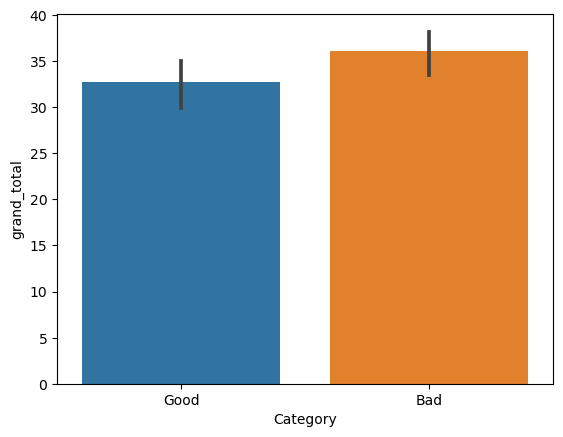

In [32]:
# create bar plot with confidence intervals for categorical data 
sns.barplot(data=thp_df2, x="Category", y="grand_total")
plt.show()

### The bar plot confirms that while 'Good' youth have the lowest 'grand_total'.  The 'Good' category  also has a smaller confidence interval for that average, so the average value is more reliable.

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1683/243899695.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= thp_df2.corr()


<Axes: >

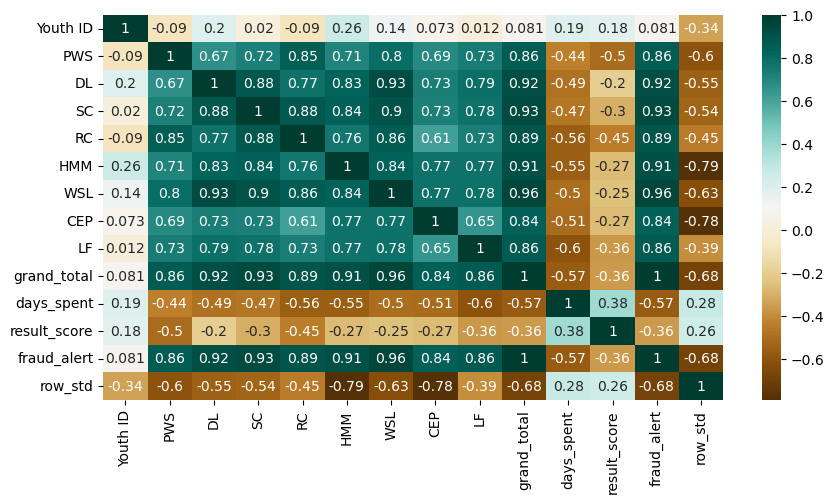

In [34]:
plt.figure(figsize=(10,5))
c= thp_df2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

<Axes: xlabel='WSL', ylabel='fraud_alert'>

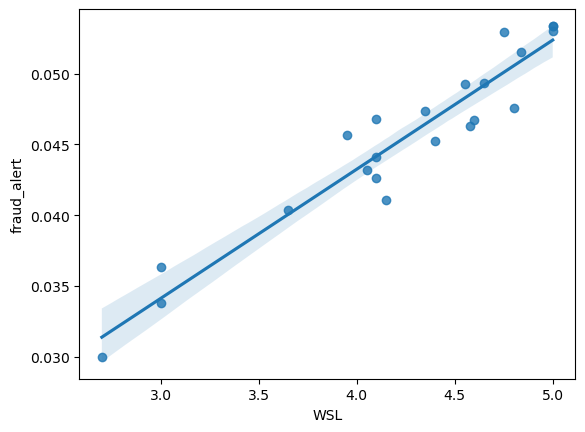

In [33]:
sns.regplot(x='WSL', y='fraud_alert', data=thp_df2)

In [35]:
import scipy.stats as stats

pearson_coef, p_value = stats.pearsonr(thp_df2['WSL'], thp_df2['fraud_alert'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.956579554093037 with a P-value of P = 3.5923593163585692e-12


### Statistical Analysis of "WSL" and "fraud_alert"

The Pearson correlation coefficient of 0.956579 indicates an extremely strong positive linear relationship between the variables "Work & Study Life (WSL)" and "fraud_alert." This high coefficient suggests that as "fraud_alert" increases, "WSL" also tends to increase, signifying a strong positive association between these two variables.

The p-value associated with this correlation is approximately 0.00000000000359, which is exceedingly small and well below the commonly used significance level of 0.05. This extremely low p-value indicates that the correlation observed is statistically significant and highly unlikely to have occurred by random chance.

Given that the p-value is less than 0.001, there is robust evidence supporting the significance of the correlation between "WSL" and "fraud_alert." This significant correlation suggests a meaningful and potentially impactful relationship, highlighting that changes in "fraud_alert" are closely linked to variations in "WSL."

<Axes: xlabel='LF', ylabel='fraud_alert'>

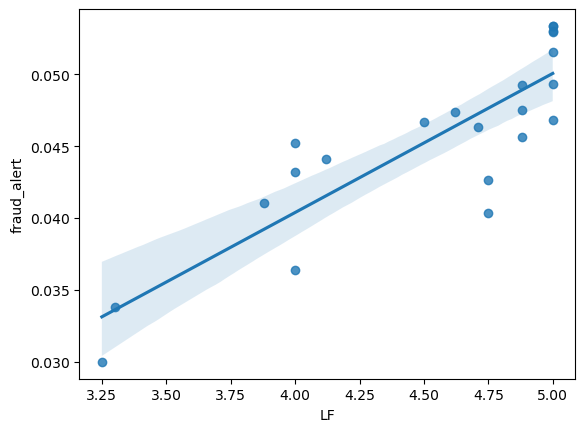

In [36]:
sns.regplot(x='LF', y='fraud_alert', data=thp_df2)


In [37]:
pearson_coef, p_value = stats.pearsonr(thp_df2['LF'], thp_df2['fraud_alert'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.862067149995417 with a P-value of P = 2.5147359623266146e-07


<Axes: xlabel='HMM', ylabel='fraud_alert'>

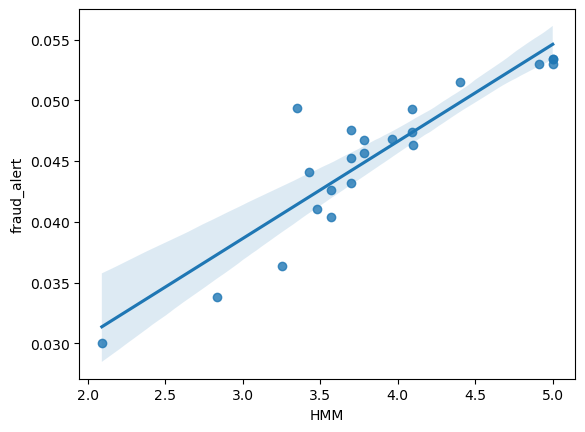

In [38]:
sns.regplot(x='HMM', y='fraud_alert', data=thp_df2)

In [39]:
pearson_coef, p_value = stats.pearsonr(thp_df2['HMM'], thp_df2['fraud_alert'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9116836036347798 with a P-value of P = 3.604113634069283e-09


In [42]:
#This will give you the success rates for males and females separately. Are the rates notiably different? 
males_success_rate = thp_df2[thp_df2['gender'] == 'M']['result_score'].mean()
females_success_rate = thp_df2[thp_df2['gender'] == 'F']['result_score'].mean()

print(f"Males Success Rate: {males_success_rate:.2f}")
print(f"Females Success Rate: {females_success_rate:.2f}")

Males Success Rate: 0.56
Females Success Rate: 0.67


In [44]:
#This will give you the fraud rates for males and females separately. Are the rates notiably different? 
males_fraud_rate = thp_df2[thp_df2['gender'] == 'M']['fraud_alert'].mean()
females_fraud_rate = thp_df2[thp_df2['gender'] == 'F']['fraud_alert'].mean()

print(f"Males fraud Rate: {males_fraud_rate:.2f}")
print(f"Females fraud Rate: {females_fraud_rate:.2f}")

Males fraud Rate: 0.04
Females fraud Rate: 0.05


Here's a refined version of your summary:

### Summary of Findings

The analysis indicates a notable difference in the average "fraud_alert" values between males and females within the dataset. Specifically, males generally exhibit lower "fraud_alert" values, averaging 0.04, whereas females display higher averages, at 0.05. These figures represent the extent of the differences on the "fraud_alert" scale, highlighting a gender-based disparity in the dataset.

<Axes: xlabel='Category', ylabel='days_spent'>

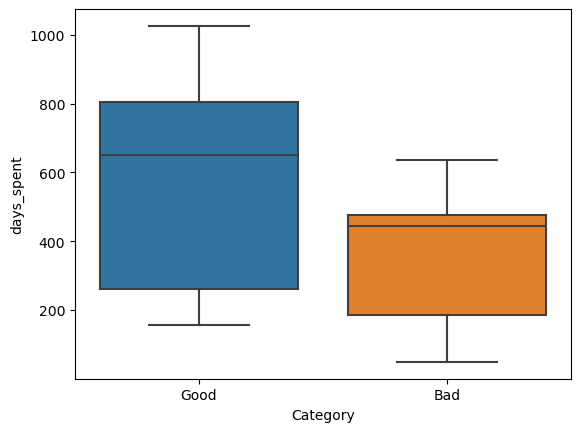

In [47]:
sns.boxplot(x='Category', y='days_spent', data=thp_df2)

<Axes: xlabel='Category', ylabel='fraud_alert'>

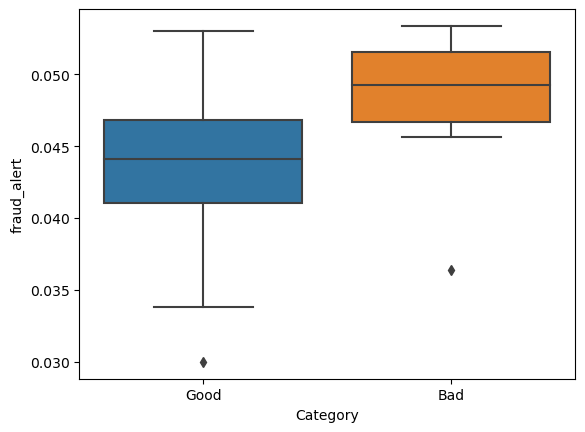

In [48]:
sns.boxplot(x='Category', y='fraud_alert', data=thp_df2)

### WSL is a potential perdictor for fraud_alert.

<Axes: xlabel='row_std', ylabel='fraud_alert'>

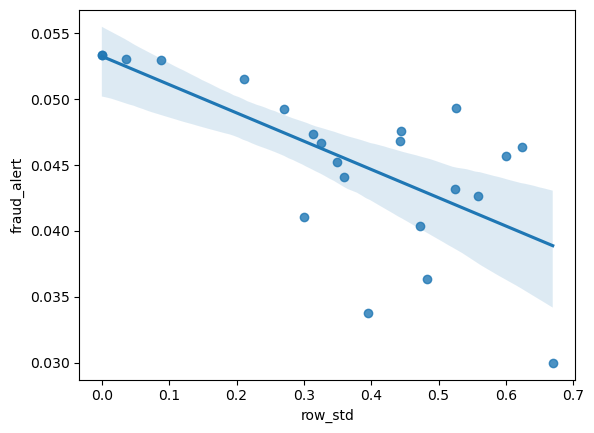

In [49]:
sns.regplot(x='row_std', y='fraud_alert', data=thp_df2)

<Axes: xlabel='HMM', ylabel='row_std'>

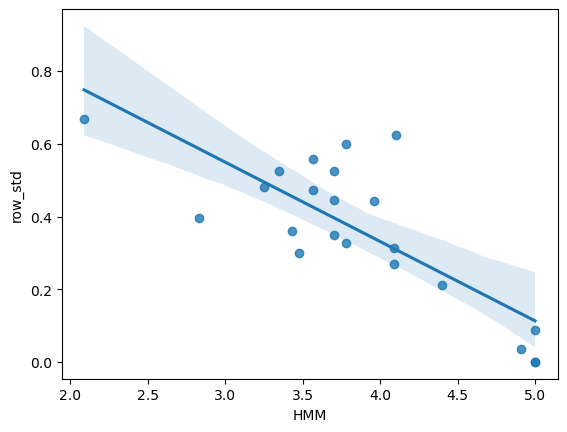

In [50]:
sns.regplot(x='HMM', y='row_std', data=thp_df2)

In [51]:
thp_df2[['row_std', 'fraud_alert']].corr()

,row_std,fraud_alert
row_std,1.000000,-0.678098
fraud_alert,-0.678098,1.000000


### row_std is a potential perdictor for fraud_alert due to a some what strong negative correlation.

<Axes: xlabel='Category', ylabel='PWS'>

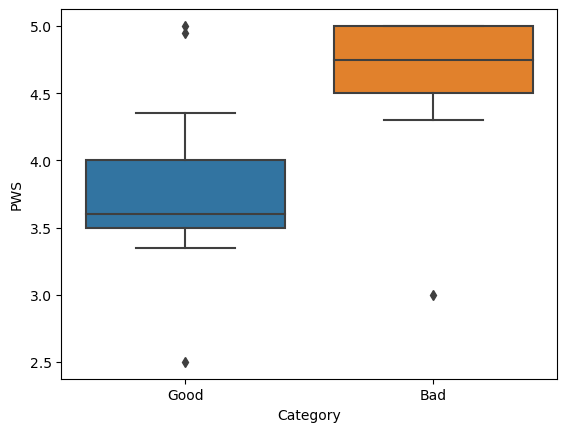

In [52]:
sns.boxplot(x='Category', y='PWS', data=thp_df2)

### Analysis Interpretation

The data suggests that youth who assessed themselves honestly and without bias tended to take the program more seriously, which correlated with greater success and longer tenure within the program. Conversely, those who assigned themselves higher scores, possibly under the misconception that higher scores would guarantee entry, generally had less successful outcomes, often resulting in discharge from the program. This pattern indicates that higher scores do not necessarily predict positive results; in fact, they may reflect a lack of self-awareness or unrealistic self-perceptions, leading to poorer performance in the program. Conversely, lower scores may indicate a more realistic self-assessment and a more earnest engagement with the program's objectives.

In [54]:
#Group by 'Category' and calculate mean of selected columns
category_groupby = thp_df2.groupby('Category')[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF', 'days_spent','row_std','fraud_alert']].mean()
category_groupby

,PWS,DL,SC,RC,HMM,WSL,CEP,LF,days_spent,row_std,fraud_alert
Category,,,,,,,,,,,
Bad,4.555556,4.552222,4.620000,4.801111,4.082222,4.437778,4.246667,4.764444,348.333333,0.303107,0.048111
Good,3.811538,4.281538,4.249231,4.378462,3.695385,4.106154,3.810769,4.356923,563.307692,0.404978,0.043615


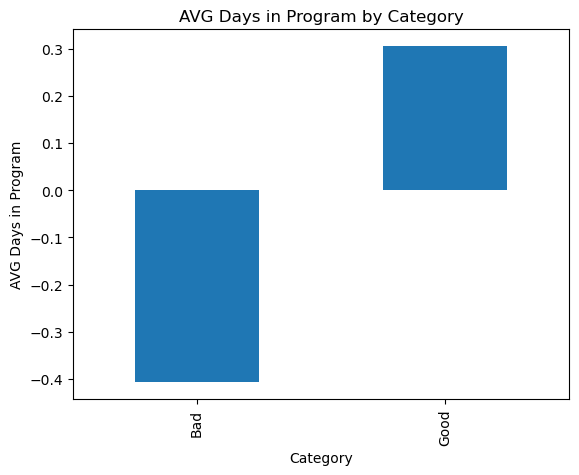

In [21]:
category_groupby['Days_in_Program'].plot(kind='bar', rot=90)
plt.ylabel('AVG Days in Program')
plt.title('AVG Days in Program by Category')
plt.show()

In [56]:
#Group by 'Gender' and calculate mean of selected columns
gender_groupby = thp_df2.groupby('gender')[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF', 'days_spent','row_std','fraud_alert']].mean()
gender_groupby

,PWS,DL,SC,RC,HMM,WSL,CEP,LF,days_spent,row_std,fraud_alert
gender,,,,,,,,,,,
F,4.558333,4.718333,4.765000,4.896667,4.14000,4.621667,4.221667,4.911667,359.5000,0.386279,0.049143
M,3.950000,4.270000,4.264375,4.421875,3.74625,4.099375,3.901875,4.378125,518.8125,0.354688,0.044071


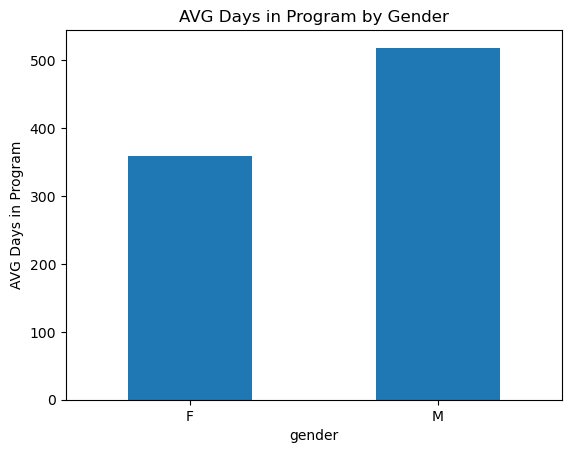

In [57]:
gender_groupby['days_spent'].plot(kind='bar', rot=360)
plt.ylabel('AVG Days in Program')
plt.title('AVG Days in Program by Gender')
plt.show()

In [58]:
thp_df2[['row_std', 'fraud_alert']].corr()

,row_std,fraud_alert
row_std,1.000000,-0.678098
fraud_alert,-0.678098,1.000000


In [59]:
thp_df2.describe()

,Youth ID,PWS,DL,SC,RC,HMM,WSL,CEP,LF,grand_total,days_spent,result_score,fraud_alert,row_std
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,11.500000,4.115909,4.392273,4.400909,4.551364,3.853636,4.241818,3.989091,4.523636,34.068636,475.363636,0.590909,0.045455,0.363303
std,6.493587,0.742965,0.683241,0.617953,0.477466,0.719739,0.661727,0.817650,0.562126,4.729559,282.466778,0.503236,0.006310,0.199258
min,1.000000,2.500000,2.240000,2.710000,3.440000,2.090000,2.700000,2.110000,3.250000,22.480000,49.000000,0.000000,0.029993,0.000000
25%,6.250000,3.562500,4.410000,4.027500,4.247500,3.502500,4.062500,3.357500,4.030000,32.047500,244.000000,0.000000,0.042758,0.277717
50%,11.500000,4.150000,4.560000,4.590000,4.780000,3.740000,4.375000,3.945000,4.750000,34.870000,469.500000,1.000000,0.046524,0.377422
75%,16.750000,4.862500,4.717500,4.820000,4.940000,4.097500,4.725000,4.780000,5.000000,36.967500,694.000000,1.000000,0.049322,0.513529
max,22.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000,1026.000000,1.000000,0.053368,0.669435


In [62]:
df_gptest=thp_df2[['gender','Category', 'fraud_alert']]
grouped_test1=df_gptest.groupby(['gender'], as_index=False).mean()
grouped_test1

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1683/2115001068.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_test1=df_gptest.groupby(['gender'], as_index=False).mean()


,gender,fraud_alert
0,F,0.049143
1,M,0.044071


#### On average it looks like female youth are more likely to lie on their assesment scores then male youth. 

In [63]:
df_gptest=thp_df2[['gender','Category', 'fraud_alert']]
grouped_test1=df_gptest.groupby(['Category',], as_index=False).mean()
grouped_test1

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1683/3430672403.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_test1=df_gptest.groupby(['Category',], as_index=False).mean()


,Category,fraud_alert
0,Bad,0.048111
1,Good,0.043615


In [67]:
#Removing Outliers
# Calculate Q1, Q3 and IQR for each column
Q1 = thp_df2.quantile(0.25)
Q3 = thp_df2.quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values that are not outliers
mask = ~((thp_df2 < (Q1 - 1.5 * IQR)) | (thp_df2 > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to get a DataFrame without outliers
remove_outliers = thp_df2[mask]

# Display the shape of the DataFrame without outliers
print(remove_outliers.shape)


(16, 16)


/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1683/3304878973.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = thp_df2.quantile(0.25)
/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1683/3304878973.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = thp_df2.quantile(0.75)
/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_1683/3304878973.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((thp_df2 < (Q1 - 1.5 * IQR)

### Observational Insight

Youth with higher scores in the "fraud_alert" category generally tend not to complete the program.

In [68]:
thp_df2.to_csv("thp_explored.csv")

In [69]:
remove_outliers.to_csv("remove_outliers.csv")